In [15]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.DataFrame([ [1,2,3,'1'],
                    [4,8,np.nan,'2'],
                    [7,8,np.nan,'3'],
                    [10,np.nan,12,'4'],
                    [np.nan,14,14,'5']],columns=['a','b','c','d'])


In [17]:
df

,a,b,c,d
0,1.0,2.0,3.0,1
1,4.0,8.0,NaN,2
2,7.0,8.0,NaN,3
3,10.0,NaN,12.0,4
4,NaN,14.0,14.0,5


# 数据初识

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       4 non-null      float64
 1   b       4 non-null      float64
 2   c       3 non-null      float64
 3   d       5 non-null      object 
dtypes: float64(3), object(1)
memory usage: 288.0+ bytes


In [22]:
df.head(1),df.tail(1)

(     a    b    c  d
 0  1.0  2.0  3.0  1,
     a     b     c  d
 4 NaN  14.0  14.0  5)

In [18]:
# 数字类型
df.describe()

,a,b,c
count,4.000000,4.000000,3.000000
mean,5.500000,8.000000,9.666667
std,3.872983,4.898979,5.859465
min,1.000000,2.000000,3.000000
25%,3.250000,6.500000,7.500000
50%,5.500000,8.000000,12.000000
75%,7.750000,9.500000,13.000000
max,10.000000,14.000000,14.000000


In [19]:
# 非数字类型
df.describe(include='object')

,d
count,5
unique,5
top,2
freq,1


In [51]:
# 数据出现的频率
df['b'].value_counts()

8.0     2
14.0    1
2.0     1
Name: b, dtype: int64

In [54]:
# 返回列的所有唯一值
df['b'].unique()

array([ 2.,  8., nan, 14.])

In [48]:
# 返回唯一值的个数
df['b'].nunique()

3

# 发现缺失值

In [61]:
# 统计缺失值数量
df.isnull().sum()

a    1
b    1
c    2
d    0
dtype: int64

In [62]:
# 缺失值大于某值的列
missing = df.isnull().sum()
missing[missing>1]

c    2
dtype: int64

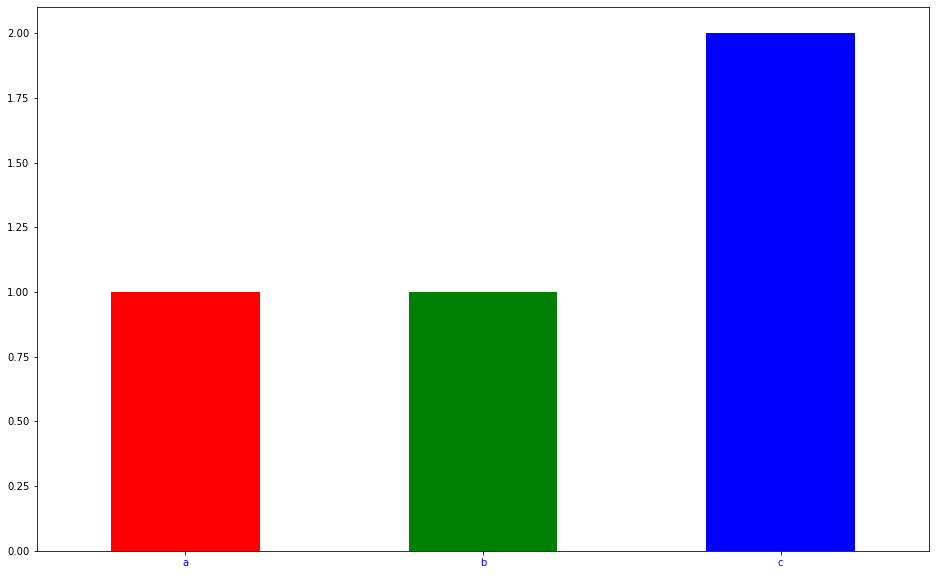

In [12]:
# nan可视化
plt.figure(figsize=(16, 10))
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(rot=0,color=['r','g','b'])
plt.xticks(color='blue',rotation=0)
plt.show()

# 删除缺失值

In [47]:
# 删除有缺失的行
df.dropna(axis=0)

,a,b,c,d
0,1.0,2.0,3.0,3


In [48]:
# 删除有缺失的列
df.dropna(axis=1)

,d
0,3
1,3
2,3
3,3
4,3


# 数值替换、缺失值填补

In [49]:
df.replace(1,2)

,a,b,c,d
0,2.0,2.0,3.0,3
1,4.0,8.0,NaN,3
2,7.0,8.0,NaN,3
3,10.0,NaN,12.0,3
4,NaN,14.0,14.0,3


In [50]:
# 均值替换
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df)
imp.transform(df)

array([[ 1.        ,  2.        ,  3.        ,  3.        ],
       [ 4.        ,  8.        ,  9.66666667,  3.        ],
       [ 7.        ,  8.        ,  9.66666667,  3.        ],
       [10.        ,  8.        , 12.        ,  3.        ],
       [ 5.5       , 14.        , 14.        ,  3.        ]])

In [51]:
# 众数替换
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(df)
imp.transform(df)

array([[1.0, 2.0, 3.0, '3'],
       [4.0, 8.0, 3.0, '3'],
       [7.0, 8.0, 3.0, '3'],
       [10.0, 8.0, 12.0, '3'],
       [1.0, 14.0, 14.0, '3']], dtype=object)

In [54]:
# 中位数替换
imp = SimpleImputer(missing_values=np.nan, strategy='median')
imp.fit(df)
imp.transform(df)

array([[ 1. ,  2. ,  3. ,  3. ],
       [ 4. ,  8. , 12. ,  3. ],
       [ 7. ,  8. , 12. ,  3. ],
       [10. ,  8. , 12. ,  3. ],
       [ 5.5, 14. , 14. ,  3. ]])

In [53]:
# 用某个数替换
imp = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value=0)
imp.fit(df)
imp.transform(df)

array([[1.0, 2.0, 3.0, '3'],
       [4.0, 8.0, 0, '3'],
       [7.0, 8.0, 0, '3'],
       [10.0, 0, 12.0, '3'],
       [0, 14.0, 14.0, '3']], dtype=object)

# 类型转换

In [63]:
df['d'].dtypes

dtype('O')

In [64]:
df['d'] = df['d'].astype("int")

In [65]:
df['d'].dtypes

dtype('int32')

In [66]:
df.describe()

,a,b,c,d
count,4.000000,4.000000,3.000000,5.000000
mean,5.500000,8.000000,9.666667,3.000000
std,3.872983,4.898979,5.859465,1.581139
min,1.000000,2.000000,3.000000,1.000000
25%,3.250000,6.500000,7.500000,2.000000
50%,5.500000,8.000000,12.000000,3.000000
75%,7.750000,9.500000,13.000000,4.000000
max,10.000000,14.000000,14.000000,5.000000


# 图形展示

In [68]:
df

,a,b,c,d
0,1.0,2.0,3.0,1
1,4.0,8.0,NaN,2
2,7.0,8.0,NaN,3
3,10.0,NaN,12.0,4
4,NaN,14.0,14.0,5


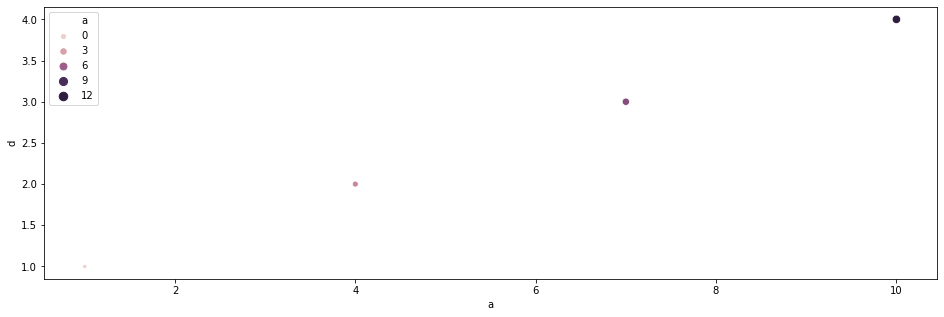

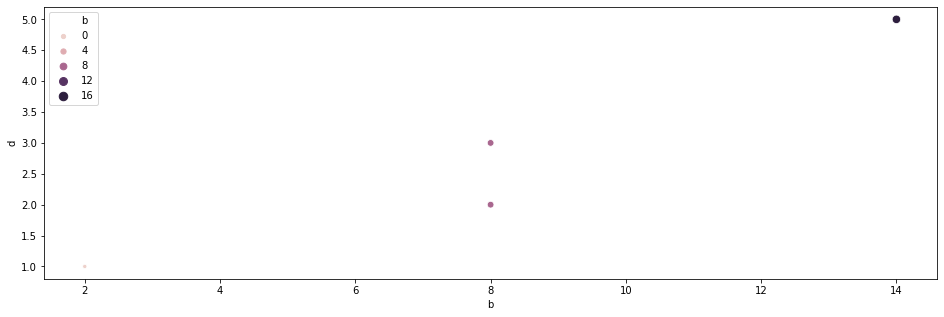

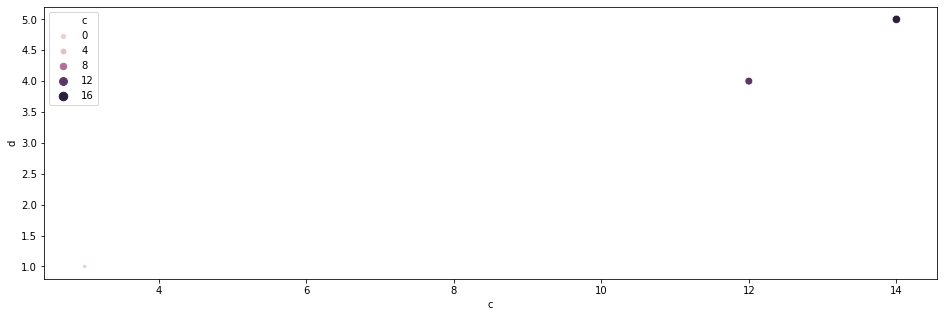

In [71]:
# 散点图
for i in df.columns[:-1]:
    plt.figure(figsize=(16, 5))
    sns.scatterplot(df.loc[:,i],df.d,hue = df.loc[:,i],size = df.loc[:,i])
    plt.show()

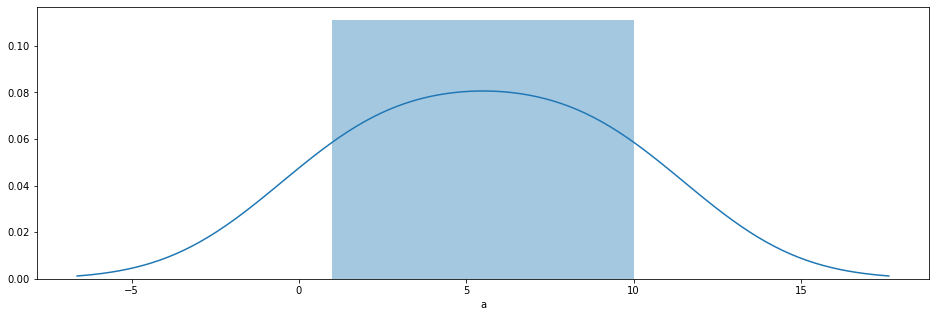

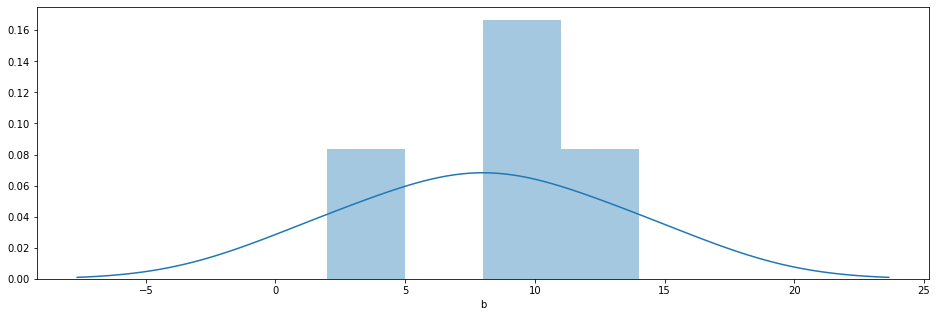

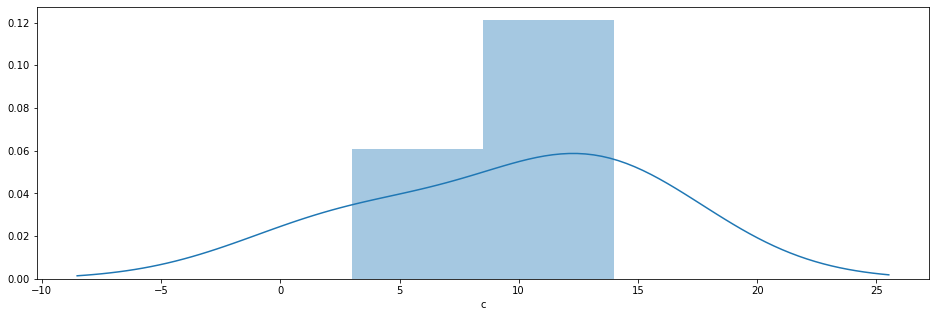

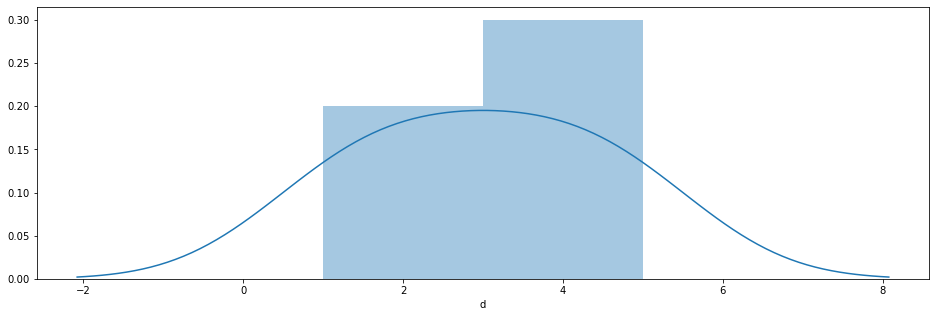

In [72]:
# 分布图
for i in range(len(df.columns)):
    plt.figure(figsize=(16, 5))
    ax = sns.distplot(df.iloc[:,i])
    plt.show()